# Mean-Shift Clustering

In [75]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler 
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Open Dataframes from File

In [76]:
# load resource_priority_df from a file
with open('pickles/resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('pickles/ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load map_movement_df from a file 
with open('pickles/lane_info_df.pickle', 'rb') as f:
    map_movement_df = pickle.load(f)
    

In [77]:
hero_id = 7 #earthshaker
resource_priority_df = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

## Function for visualizing counts

In [78]:
def show_cluster_counts(dataframe, graph_name):
    role_counts = np.bincount(dataframe)

    plt.bar(range(len(role_counts)), role_counts)

    plt.xlabel('Role')
    plt.ylabel('Count')
    plt.title(graph_name)

    plt.show()

## Mean Shift -- Resource Prioritization

In [86]:
hero_id = 7 #earthshaker
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

389


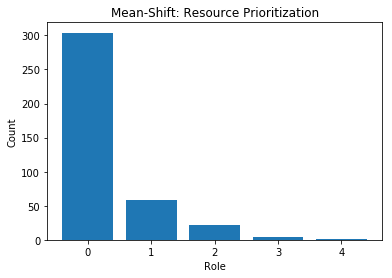

In [87]:
scale = StandardScaler()
scaled_df_rp = scale.fit_transform(X_rp[['xpm_priority', 'gold_priority']])

meanshift_rp = MeanShift(bandwidth=.75)

meanshift_rp.fit(scaled_df_rp)

target_hero_roles_rp = meanshift_rp.predict(scaled_df_rp)

print(len(target_hero_roles_rp)) 

show_cluster_counts(target_hero_roles_rp, "Mean-Shift: Resource Prioritization")

## Mean Shift -- Ability Prioritization

In [81]:
ability_priority_df.dropna(inplace=True)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 2 2 1 2 2 3 5 3 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


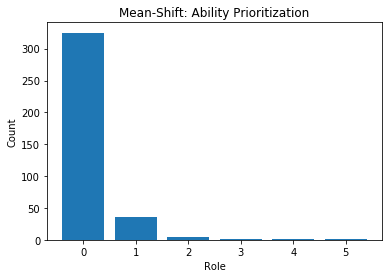

In [82]:
scale = StandardScaler()
scaled_df_ap = scale.fit_transform(ability_priority_df[['A1', 'A2', 'A3', 'A4']])

meanshift_ap = MeanShift(bandwidth=1.5)

meanshift_ap.fit(scaled_df_ap)

target_hero_roles_ap = meanshift_ap.predict(scaled_df_ap)

print(target_hero_roles_ap) 

show_cluster_counts(target_hero_roles_ap, "Mean-Shift: Ability Prioritization")

## Mean Shift -- Lane Info


[0 0 1 1 0 0 1 0 0 1 0 0 2 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 2 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 4 0 0 0 2 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 1 0 2 0 1 4
 0 1 0 2 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 3 1 1 1 1 0 0
 0 0 2 1 0 1 3 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 3 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 2 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 2 0 0
 0 0 0 2 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 0 0 0 2 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 0]


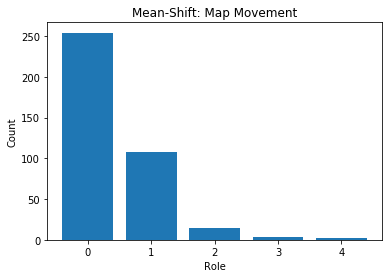

In [83]:
scale = StandardScaler()
scaled_df_lane = scale.fit_transform(map_movement_df[['off', 'mid', 'safe', 'roaming']])

meanshift_lane = MeanShift(bandwidth=1)

meanshift_lane.fit(scaled_df_lane)

target_hero_roles_mm = meanshift_lane.predict(scaled_df_lane)

print(target_hero_roles_mm) 

show_cluster_counts(target_hero_roles_mm, "Mean-Shift: Map Movement")

## Save Results to File

In [88]:
# add match_ids to labels
resource_priority_meanshift = pd.DataFrame({'match_id': X_rp['match_id'], 'labels': target_hero_roles_rp})
ability_priority_meanshift = pd.DataFrame({'match_id': ability_priority_df['match_id'], 'labels': target_hero_roles_ap})
map_movement_meanshift = pd.DataFrame({'match_id': map_movement_df['match_id'], 'labels': target_hero_roles_mm})

# save resource_priority_meanshift to a file
with open('pickles/results_RP_meanshift.pickle', 'wb') as f:
    pickle.dump(resource_priority_meanshift, f)

# save ability_priority_meanshift to a file
with open('pickles/results_AP_meanshift.pickle', 'wb') as f:
    pickle.dump(ability_priority_meanshift, f)  
    
# save map_movement_meanshift to a file
with open('pickles/results_MM_meanshift.pickle', 'wb') as f:
    pickle.dump(map_movement_meanshift, f)  